In [344]:
# Importing the required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#uncomment below only if imblearn is not installed 
#restart Jupyter engine again is still fails to import imblearn
#!pip install imblearn --user  
from imblearn.over_sampling import SMOTE 

from sklearn.metrics import confusion_matrix
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [345]:
data = pd.read_csv("telecom_churn_data.csv", sep=',', encoding='ISO-8859-1')

In [346]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [347]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [348]:
def printingConfusionMetricDetails(confusion_metric):
    TP = confusion_metric[1,1] # true positive 
    TN = confusion_metric[0,0] # true negatives
    FP = confusion_metric[0,1] # false positives
    FN = confusion_metric[1,0] # false negatives

    print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
    print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
    print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
    print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
    print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
    print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

    print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


In [349]:
def printingMSEandRsquare(y_test, y_pred):
    mean_square_err = mean_squared_error(y_test, y_pred)
    r_square = r2_score(y_test, y_pred)
    print(mean_square_err)
    print(r_square)

In [350]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [351]:
#drop mobile number 
data.drop('mobile_number',axis=1,inplace=True)

In [352]:
#check for missing values
data.isna().sum()

circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
                        ... 
aon                        0
aug_vbc_3g                 0
jul_vbc_3g                 0
jun_vbc_3g                 0
sep_vbc_3g                 0
Length: 225, dtype: int64

In [353]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
188,arpu_3g_6,74.846748
176,av_rech_amt_data_6,74.846748
216,fb_user_6,74.846748
196,night_pck_user_6,74.846748
160,total_rech_data_6,74.846748
...,...,...
145,max_rech_amt_7,0.000000
144,max_rech_amt_6,0.000000
143,total_rech_amt_9,0.000000
142,total_rech_amt_8,0.000000


In [354]:
#Dropping columns where null are more than 95%
data.loc[:, data.isnull().mean() < .95]
# 1 column dropped

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
99995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,77.811,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
99996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,0.000,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00
99997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,303.386,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.00


In [355]:
#DATA IMPUTATION
#We can also use MICE imputation 
#data imputation for categorical columns (fb and nigh pack users) as -1
data=data.fillna({'fb_user_6':-1,'fb_user_7':-1,'fb_user_8':-1})
data=data.fillna({'night_pck_user_6':-1,'night_pck_user_7':-1,'night_pck_user_8':-1})
#data imputation for non categorical as 0 which means no recharge happened
data=data.fillna(0)

In [356]:
#verifying imputation and null
data.isna().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
                       ..
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
sep_vbc_3g              0
Length: 225, dtype: int64

In [357]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
0,circle_id,0.0
113,std_ic_t2o_mou_7,0.0
143,total_rech_amt_9,0.0
144,max_rech_amt_6,0.0
145,max_rech_amt_7,0.0
...,...,...
79,og_others_9,0.0
80,total_og_mou_6,0.0
81,total_og_mou_7,0.0
82,total_og_mou_8,0.0


In [358]:
## No missing values now 
##Renaming columns to get them inline with month codes
data =data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7',
                           'aug_vbc_3g': 'vbc_3g_8','sep_vbc_3g': 'vbc_3g_9'})

In [359]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               floa

In [360]:
#data.describe()
data.shape

(99999, 225)

In [361]:
#Deriving Features
data['amt_data_6'] = data.total_rech_amt_6 + data.total_rech_data_6           
data['amt_data_7'] = data.total_rech_amt_7 + data.total_rech_data_7
#  average recharge by customer in June and July
data['avg_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

#Retaining customers whose recharge amount is >= 70th percentile amount

data_filtered = data.loc[data.avg_amt_data_6_7 >= data.avg_amt_data_6_7.quantile(0.7), :]
data_filtered = data_filtered.reset_index(drop=True)
data_filtered.shape

(30019, 228)

In [362]:
data_filtered["last_date_of_month_6"] = pd.to_datetime(data_filtered["last_date_of_month_6"])
data_filtered["last_date_of_month_7"] = pd.to_datetime(data_filtered["last_date_of_month_7"])
data_filtered["last_date_of_month_8"] = pd.to_datetime(data_filtered["last_date_of_month_8"])
data_filtered["date_of_last_rech_6"] = pd.to_datetime(data_filtered["date_of_last_rech_6"])
data_filtered["date_of_last_rech_7"] = pd.to_datetime(data_filtered["date_of_last_rech_7"])
data_filtered["date_of_last_rech_8"] = pd.to_datetime(data_filtered["date_of_last_rech_8"])

#3 new columns for days since recharge.
data_filtered["days_since_recharge_6"] = data_filtered["last_date_of_month_6"] - data_filtered["date_of_last_rech_6"]
data_filtered["days_since_recharge_7"] = data_filtered["last_date_of_month_7"] - data_filtered["date_of_last_rech_7"]
data_filtered["days_since_recharge_8"] = data_filtered["last_date_of_month_8"] - data_filtered["date_of_last_rech_8"]

#converting into days
data_filtered["days_since_recharge_6"] = data_filtered["days_since_recharge_6"].dt.days
data_filtered["days_since_recharge_7"] = data_filtered["days_since_recharge_7"].dt.days
data_filtered["days_since_recharge_8"] = data_filtered["days_since_recharge_8"].dt.days

date_columns_to_be_dropped = ["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8", 
                              "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8",
                              "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8"]
data_filtered = data_filtered.drop(columns=date_columns_to_be_dropped)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 222 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               f

In [363]:
# HANDLING OUTLIERS
#z_scores = stats.zscore(data_filtered)

#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#data_filtered = data_filtered[filtered_entries]

#Using Quantile method ##method is removing all churn_flag=1 rows
Q1 = data_filtered.quantile(0.1)
Q3 = data_filtered.quantile(0.9)
IQR = Q3 - Q1

data_filtered = data_filtered[~((data_filtered < (Q1 - 1.5 * IQR)) |(data_filtered > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4131 entries, 1 to 30013
Data columns (total 222 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               fl

In [364]:
#Identifying Churn customers
data_filtered['churn_flag'] = np.where(((data_filtered['total_ic_mou_9'] == 0.00) | (data_filtered['total_og_mou_9'] == 0.00))
                            & ((data_filtered['vol_2g_mb_9'] == 0.00) | (data_filtered['vol_3g_mb_9'] == 0.00))
                            , 1, 0)
print(data_filtered['churn_flag'].value_counts())


0    3540
1     591
Name: churn_flag, dtype: int64


In [365]:
#CONSOLIDATION OF OTHER VALUES IS NEEDED 

In [366]:
#now that every column follows same naming patter drop features related to Churn Phase
data_filtered = data_filtered.drop(data_filtered.filter(regex='_9', axis = 1).columns, axis=1)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4131 entries, 1 to 30013
Data columns (total 168 columns):
circle_id                int64
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
lo

In [367]:
#Plotting heatmap to get an overall picture
#plt.figure(figsize = (50, 30))
#sns.heatmap(data_filtered.corr(), annot = True, cmap="YlGnBu")
#plt.show()

In [368]:
## Heatmap is not of much help with large no of features
#Analysing further all numeric (float and int) variables in the dataset
#Its one and the same now ..selection is not needed .. all numeric DF
#data_numeric = data_filtered.select_dtypes(include=['float64', 'int64','int32'])

data_numeric=data_filtered
data_numeric.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,amt_data_6,amt_data_7,avg_amt_data_6_7,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn_flag
1,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,21.03,910.65,122.16,437.0,603.0,520.0,5,0,1,0
4,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,0.00,0.00,816.0,0.0,408.0,0,1,6,0
5,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,0.00,0.00,600.0,680.0,640.0,0,0,0,0
8,109,0.0,0.0,0.0,363.987,486.558,393.909,248.99,619.96,666.38,...,0.00,0.00,0.00,420.0,636.0,528.0,0,3,7,0
18,109,0.0,0.0,0.0,324.449,382.389,350.360,381.23,635.28,551.61,...,0.00,0.00,0.00,356.0,424.0,390.0,9,0,0,0


In [369]:
correlation = data_numeric.corr()
correlation

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,vbc_3g_8,vbc_3g_7,vbc_3g_6,amt_data_6,amt_data_7,avg_amt_data_6_7,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn_flag
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,NaN,NaN,NaN,NaN,1.000000,0.169167,0.106490,0.387070,0.069386,0.049970,...,-0.006295,-0.003889,0.035006,0.928246,0.133810,0.720570,-0.163274,0.068896,-0.023480,0.105366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avg_amt_data_6_7,NaN,NaN,NaN,NaN,0.720570,0.748918,0.410395,0.306803,0.294260,0.220146,...,0.004097,0.004418,0.007343,0.736649,0.736974,1.000000,-0.146767,-0.124679,-0.070990,0.007181
days_since_recharge_6,NaN,NaN,NaN,NaN,-0.163274,-0.112824,-0.030142,-0.156149,-0.123222,-0.091459,...,0.137851,0.145453,0.139246,-0.210706,-0.005627,-0.146767,1.000000,0.162649,0.162079,-0.023865
days_since_recharge_7,NaN,NaN,NaN,NaN,0.068896,-0.229632,-0.267995,-0.000843,-0.123746,-0.179831,...,0.098045,0.130291,0.142650,0.097068,-0.280699,-0.124679,0.162649,1.000000,0.236495,0.140634
days_since_recharge_8,NaN,NaN,NaN,NaN,-0.023480,-0.106731,-0.305463,-0.042520,-0.090120,-0.209369,...,0.089936,0.114484,0.092904,-0.010243,-0.094347,-0.070990,0.162079,0.236495,1.000000,0.231196


In [370]:
#Top 5 correlation
print (correlation['churn_flag'].sort_values(ascending=False)[:6], '\n')

churn_flag               1.000000
days_since_recharge_8    0.231196
std_og_mou_6             0.198392
roam_og_mou_8            0.172915
std_og_t2m_mou_6         0.151111
total_og_mou_6           0.141059
Name: churn_flag, dtype: float64 



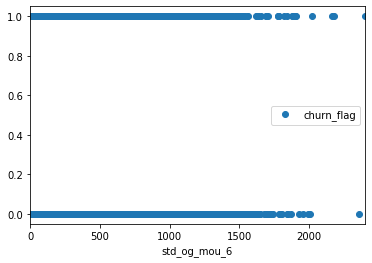

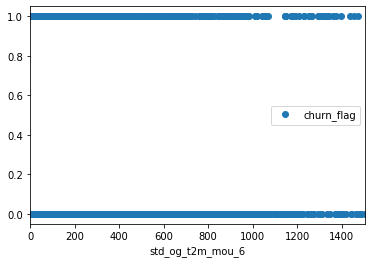

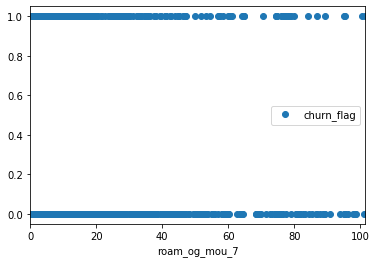

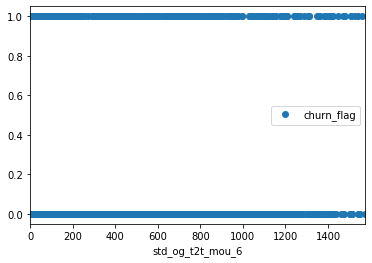

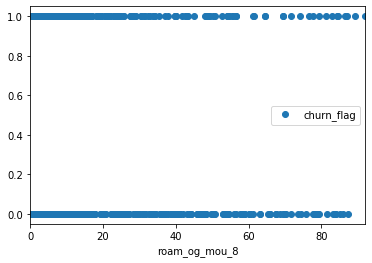

In [371]:
data_numeric.plot(y='churn_flag', x='std_og_mou_6',style ='o')
data_numeric.plot(y='churn_flag', x='std_og_t2m_mou_6',style ='o')
data_numeric.plot(y='churn_flag', x='roam_og_mou_7',style ='o')
data_numeric.plot(y='churn_flag', x='std_og_t2t_mou_6',style ='o')
data_numeric.plot(y='churn_flag', x='roam_og_mou_8',style ='o')


In [372]:
#Analysing categorical variables
#data_nonnum= data_filtered.select_dtypes(exclude=['float64', 'int64'])
#data_nonnum.describe()

In [373]:
data_filtered.shape

(4131, 168)

In [374]:
#SPLITTING DATA SET
# Putting feature variable to X
from sklearn.model_selection import train_test_split

X = data_filtered.drop(['churn_flag'],axis=1)

# Putting response variable to y
y = data_filtered['churn_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size=0.3, random_state=100)
print ("Shape of Train dataset",X_train.shape, y_train.shape)
print ("Shape of Test dataset",X_test.shape, y_test.shape)


Shape of Train dataset (2891, 167) (2891,)
Shape of Test dataset (1240, 167) (1240,)


In [375]:
#TREATING CLASS IMBALANCE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
sm =  SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 


Before OverSampling, counts of label '1': 429
Before OverSampling, counts of label '0': 2462 

After OverSampling, the shape of train_X: (4924, 167)
After OverSampling, the shape of train_y: (4924,) 

After OverSampling, counts of label '1': 2462
After OverSampling, counts of label '0': 2462


In [376]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 

train_after_scaling = scaler.transform(X_train)
test_after_scaling = scaler.transform(X_test)

In [377]:
logreg = LogisticRegression()

logreg.fit(train_after_scaling, y_train)

lr = LogisticRegression(solver = 'lbfgs')


In [378]:
#list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [379]:
y_pred = logreg.predict(test_after_scaling)

In [380]:
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [381]:
y_pred.size

1240

In [382]:
y_test

3796     0
13082    0
15407    0
10405    0
29795    0
        ..
28075    0
23197    0
29690    0
27240    0
19030    0
Name: churn_flag, Length: 1240, dtype: int32

In [383]:
printingMSEandRsquare(y_test, y_pred)

0.13629032258064516
-0.199981676172152


In [384]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)


[[952 126]
 [ 43 119]]


In [385]:
printingConfusionMetricDetails(confusion_matrix_1)

Acuracy Score 0.5879032258064516
Sensitivity:  0.7345679012345679
Specificity:  0.8831168831168831
false postive rate:  0.11688311688311688
positive predictive value:  0.4857142857142857
Negative predictive value:  0.9567839195979899
Misclassification Rate:  0.13629032258064516


In [386]:
x = train_after_scaling

In [387]:
from sklearn.decomposition import PCA

In [388]:
pca = PCA(random_state=42)

In [389]:
pca.fit(x)

PCA(random_state=42)

In [390]:
pca.components_

array([[ 1.10919442e-18,  5.55111512e-17, -2.22044605e-16, ...,
         5.85994808e-02,  3.43645251e-02,  2.02765091e-02],
       [-5.42569738e-19,  1.38777878e-17, -1.38777878e-16, ...,
        -7.38384194e-03, -4.29388616e-02, -3.69425656e-02],
       [ 2.04825618e-18, -0.00000000e+00,  2.77555756e-17, ...,
        -4.13392385e-02, -9.08952173e-02, -7.09887196e-02],
       ...,
       [-0.00000000e+00,  1.42056690e-16, -4.83869306e-18, ...,
         6.16772970e-22,  4.19045861e-22, -2.98872022e-22],
       [ 9.99986033e-01, -1.27192287e-03,  1.16945065e-03, ...,
        -3.82858892e-19,  3.36102673e-18,  2.92734587e-18],
       [ 0.00000000e+00,  2.01623382e-01,  6.25297968e-01, ...,
        -4.85722573e-17,  1.38777878e-17, -1.38777878e-17]])

In [391]:
pca.explained_variance_ratio_

array([1.58339789e-01, 1.09973655e-01, 6.84943737e-02, 4.45217524e-02,
       3.96684327e-02, 3.66581968e-02, 2.79044267e-02, 2.55743938e-02,
       2.37046897e-02, 2.27310552e-02, 1.72769143e-02, 1.64356382e-02,
       1.53446487e-02, 1.46513910e-02, 1.44532759e-02, 1.37069042e-02,
       1.31829716e-02, 1.15797153e-02, 1.10305248e-02, 1.06068464e-02,
       9.87696739e-03, 9.66659737e-03, 9.04180891e-03, 8.95511406e-03,
       8.66909805e-03, 8.29041766e-03, 8.14448261e-03, 8.03710110e-03,
       7.68875239e-03, 7.47098121e-03, 7.36747358e-03, 7.16735416e-03,
       6.88061935e-03, 6.72057626e-03, 6.52423939e-03, 6.36396987e-03,
       6.19556728e-03, 5.96890933e-03, 5.88246020e-03, 5.72504171e-03,
       5.55896470e-03, 5.45329636e-03, 5.27926679e-03, 5.06721257e-03,
       5.02676396e-03, 4.93478694e-03, 4.81512557e-03, 4.57417691e-03,
       4.47910142e-03, 4.33124837e-03, 4.26496208e-03, 4.13571743e-03,
       4.04989986e-03, 3.96170606e-03, 3.86652362e-03, 3.60050551e-03,
      

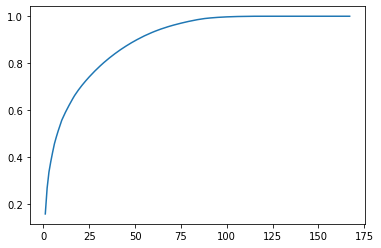

In [392]:
#75 percent of component explain close to 90 percent of variace
import matplotlib.pyplot as plt
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [393]:
#pc2 = PCA(n_components=75, random_state=42)
from sklearn.decomposition import IncrementalPCA

pcaFinal = IncrementalPCA(n_components=75)
train_pca = pcaFinal.fit_transform(train_after_scaling)
train_pca.shape

(4924, 75)

In [394]:
#Applying selected components to the test data - 75 components
test_pca = pcaFinal.fit_transform(test_after_scaling)
test_pca.shape 


(1240, 75)

In [395]:
train_pca

array([[ 6.03537633, -2.0505779 ,  4.82107254, ...,  0.79849385,
        -1.41602102, -2.27873833],
       [-1.93952369, -0.28601244,  2.26212169, ..., -0.54895226,
         0.72525432,  0.35044059],
       [10.3947402 ,  0.32029841,  2.40679928, ...,  0.23315501,
         0.183089  , -0.43785625],
       ...,
       [-2.00065248, -0.18260926,  0.85471886, ...,  0.40640891,
        -0.14819037, -0.05023526],
       [-1.03246302, -2.84055552,  0.04376081, ..., -0.6646883 ,
        -0.44487759,  0.11372054],
       [-2.74099632, -4.20565157, -4.16796523, ..., -0.29146417,
        -0.48783461,  0.05597049]])

In [396]:
y_train.shape

(4924,)

In [397]:
logreg = LogisticRegression()

logreg.fit(train_pca, y_train)

LogisticRegression()

In [398]:
y_pred = logreg.predict(test_pca)


In [399]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [400]:
y_pred.size

1240

In [401]:
y_test

3796     0
13082    0
15407    0
10405    0
29795    0
        ..
28075    0
23197    0
29690    0
27240    0
19030    0
Name: churn_flag, Length: 1240, dtype: int32

In [402]:
printingMSEandRsquare(y_test, y_pred)

0.4508064516129032
-2.969170159646349


In [403]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
print(confusion_matrix2)

[[556 522]
 [ 37 125]]


In [404]:
printingConfusionMetricDetails(confusion_matrix2)

Acuracy Score 0.5879032258064516
Sensitivity:  0.7716049382716049
Specificity:  0.5157699443413729
false postive rate:  0.4842300556586271
positive predictive value:  0.19319938176197837
Negative predictive value:  0.9376053962900506
Misclassification Rate:  0.4508064516129032


In [405]:
# Decision tree after Logistic regression

# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [406]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.57      0.70      1078
           1       0.20      0.73      0.32       162

    accuracy                           0.59      1240
   macro avg       0.57      0.65      0.51      1240
weighted avg       0.84      0.59      0.65      1240

[[610 468]
 [ 44 118]]
Acuracy Score 0.5870967741935483


In [407]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
printingConfusionMetricDetails(confusion_tree)

Acuracy Score 0.5870967741935483
Sensitivity:  0.7283950617283951
Specificity:  0.5658627087198516
false postive rate:  0.43413729128014844
positive predictive value:  0.20136518771331058
Negative predictive value:  0.9327217125382263
Misclassification Rate:  0.4129032258064516


In [408]:
########## lets tune hyper parameters
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}



In [409]:
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)


In [410]:

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)


In [411]:
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [412]:
y_train.shape

(4924,)

In [413]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.063563,0.008060,0.0012,3.998048e-04,1,{'max_depth': 1},0.700508,0.708629,0.724873,0.713706,...,0.709584,0.009187,38,0.720487,0.719726,0.715156,0.719218,0.713706,0.717659,0.002705
1,0.089349,0.009019,0.0010,5.761645e-07,2,{'max_depth': 2},0.703553,0.708629,0.724873,0.713706,...,0.709177,0.009963,39,0.723280,0.724803,0.715156,0.719218,0.732234,0.722938,0.005734
2,0.135323,0.011319,0.0012,3.987315e-04,3,{'max_depth': 3},0.775635,0.777665,0.783756,0.793909,...,0.773347,0.019834,37,0.807565,0.780401,0.783448,0.789794,0.784264,0.789094,0.009721
3,0.173101,0.012214,0.0010,4.523674e-07,4,{'max_depth': 4},0.777665,0.770558,0.796954,0.818274,...,0.783503,0.022173,36,0.828891,0.809089,0.814928,0.817212,0.794162,0.812856,0.011349
4,0.203683,0.011781,0.0010,3.693565e-07,5,{'max_depth': 5},0.824365,0.827411,0.811168,0.844670,...,0.819246,0.018669,35,0.861894,0.851993,0.843869,0.854278,0.841117,0.850630,0.007460


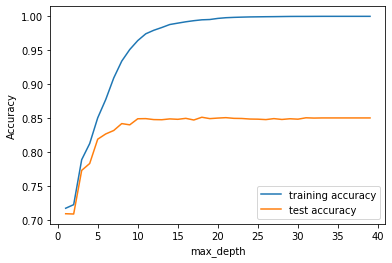

In [414]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# seems 15 or 20 Max depth

In [415]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [416]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.406168,0.036599,0.0012,4.003525e-04,5,{'min_samples_leaf': 5},0.817259,0.846701,0.828426,0.843655,...,0.834281,0.010652,1,0.960650,0.952272,0.949987,0.951003,0.955838,0.953950,0.003890
1,0.301827,0.018793,0.0010,8.609519e-07,25,{'min_samples_leaf': 25},0.810152,0.830457,0.834518,0.832487,...,0.821279,0.014249,2,0.873826,0.875349,0.876111,0.861132,0.877157,0.872715,0.005892
2,0.275642,0.018204,0.0012,3.997808e-04,45,{'min_samples_leaf': 45},0.807107,0.813198,0.791878,0.844670,...,0.810720,0.018558,3,0.854532,0.843107,0.840823,0.840315,0.841371,0.844029,0.005335
3,0.233466,0.023196,0.0010,3.504023e-07,65,{'min_samples_leaf': 65},0.800000,0.804061,0.796954,0.825381,...,0.801580,0.014139,4,0.833968,0.828891,0.831175,0.829144,0.824112,0.829458,0.003234
4,0.223273,0.020193,0.0008,3.999234e-04,85,{'min_samples_leaf': 85},0.793909,0.803046,0.803046,0.822335,...,0.800565,0.013665,5,0.833460,0.824321,0.818736,0.817720,0.819289,0.822705,0.005840


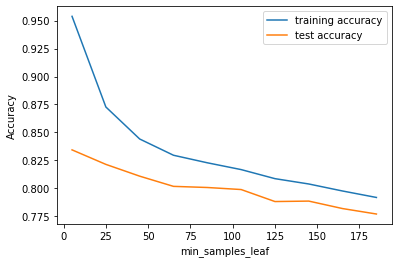

In [417]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 5 to 150

In [418]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [419]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.469531,0.052866,0.0008,4.001142e-04,5,{'min_samples_split': 5},0.827411,0.865990,0.838579,0.870051,...,0.848699,0.016509,1,0.992638,0.992892,0.995430,0.992384,0.993909,0.993450,0.001117
1,0.450942,0.019661,0.0010,4.156970e-07,25,{'min_samples_split': 25},0.816244,0.847716,0.833503,0.857868,...,0.835090,0.015874,2,0.952526,0.947956,0.944910,0.947702,0.957107,0.950040,0.004295
2,0.459137,0.023117,0.0010,3.873843e-07,45,{'min_samples_split': 45},0.798985,0.824365,0.833503,0.846701,...,0.825345,0.015641,3,0.930439,0.912668,0.918253,0.910891,0.921320,0.918714,0.006960
3,0.453939,0.024526,0.0014,4.896098e-04,65,{'min_samples_split': 65},0.786802,0.817259,0.836548,0.835533,...,0.817627,0.018225,4,0.913938,0.900228,0.907083,0.899467,0.897462,0.903636,0.006085
4,0.466133,0.046430,0.0008,3.998764e-04,85,{'min_samples_split': 85},0.794924,0.807107,0.829442,0.844670,...,0.817627,0.017486,4,0.901498,0.885504,0.887535,0.886519,0.879949,0.888201,0.007148


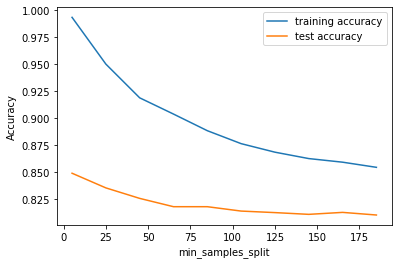

In [420]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 25

In [421]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  6.8min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', verbose=1)

In [422]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.779353,0.031200,0.001600,7.997160e-04,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.820305,0.823350,0.806091,0.853807,0.784553,0.817621,0.022698,13
1,0.781352,0.025129,0.001400,4.892592e-04,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.818274,0.823350,0.804061,0.853807,0.786585,0.817216,0.022311,16
2,0.883494,0.101279,0.001600,4.893569e-04,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.818274,0.819289,0.804061,0.847716,0.783537,0.814575,0.021015,25
3,0.982238,0.028997,0.001799,7.479588e-04,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.818274,0.819289,0.804061,0.841624,0.773374,0.811325,0.022462,44
4,0.932467,0.068968,0.001999,5.436780e-07,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.818274,0.806091,0.804061,0.839594,0.773374,0.808279,0.021547,59


In [423]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8403720440757706
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=5, min_samples_split=25)


In [424]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [425]:
y_pred_default = clf_gini.predict(test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[614, 464],
       [ 65,  97]], dtype=int64)

In [426]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.5733870967741935
Sensitivity:  0.5987654320987654
Specificity:  0.5695732838589982
false postive rate:  0.43042671614100186
positive predictive value:  0.17290552584670232
Negative predictive value:  0.9042709867452136
Misclassification Rate:  0.4266129032258065


In [427]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(test_pca)

In [428]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[862, 216],
       [114,  48]], dtype=int64)

In [429]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.7338709677419355
Sensitivity:  0.5987654320987654
Specificity:  0.5695732838589982
false postive rate:  0.43042671614100186
positive predictive value:  0.17290552584670232
Negative predictive value:  0.9042709867452136
Misclassification Rate:  0.4266129032258065


In [430]:
#Lets do some hyper parameter tuning  for RF

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf_with_pca.fit(train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [431]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.803770,0.051753,0.047573,0.015440,2,{'max_depth': 2},0.789848,0.781726,0.837563,0.831472,...,0.804626,0.024646,4,0.829906,0.805534,0.811120,0.823052,0.801777,0.814278,0.010620
1,4.701127,0.096095,0.053170,0.009169,7,{'max_depth': 7},0.879188,0.897462,0.913706,0.920812,...,0.900892,0.014843,3,0.949733,0.942371,0.944402,0.937801,0.945431,0.943948,0.003902
2,6.459772,0.153840,0.065988,0.021973,12,{'max_depth': 12},0.913706,0.938071,0.942132,0.952284,...,0.936027,0.012715,2,0.987560,0.987560,0.986545,0.986799,0.986548,0.987002,0.000465
3,6.544903,0.534287,0.051397,0.011950,17,{'max_depth': 17},0.920812,0.941117,0.947208,0.958376,...,0.941511,0.012228,1,0.994161,0.997207,0.996192,0.995430,0.995685,0.995735,0.000995


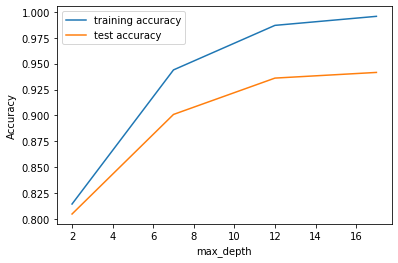

In [432]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 10 to 12

In [433]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [434]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.782438,0.421848,0.112536,0.025050,100,{'n_estimators': 100},0.901523,0.928934,0.939086,0.947208,...,0.928310,0.015515,3,0.980198,0.979183,0.979183,0.977405,0.978426,0.978879,0.000927
1,33.753307,2.586550,0.422759,0.082385,500,{'n_estimators': 500},0.908629,0.923858,0.939086,0.949239,...,0.928106,0.014387,4,0.979944,0.978675,0.979944,0.979436,0.977665,0.979133,0.000869
2,51.343754,7.733232,0.422359,0.017201,900,{'n_estimators': 900},0.908629,0.929949,0.938071,0.945178,...,0.929122,0.012546,2,0.980706,0.978675,0.978675,0.978421,0.978934,0.979082,0.000828
3,53.548191,7.002019,0.492119,0.110135,1300,{'n_estimators': 1300},0.910660,0.926904,0.941117,0.952284,...,0.931355,0.014228,1,0.981214,0.978421,0.979183,0.979183,0.977665,0.979133,0.001183


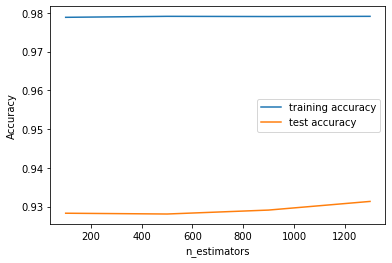

In [435]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [436]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [437]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.650084,0.064899,0.047574,0.007783,4,{'max_features': 4},0.901523,0.924873,0.942132,0.952284,...,0.929325,0.017299,1,0.977659,0.978421,0.976136,0.976644,0.977665,0.977305,0.000813
1,4.499228,0.032233,0.048373,0.009345,8,{'max_features': 8},0.910660,0.925888,0.939086,0.947208,...,0.929325,0.012697,2,0.979944,0.978929,0.979690,0.975121,0.976396,0.978016,0.001916
2,7.538108,0.123605,0.046574,0.007084,14,{'max_features': 14},0.913706,0.930964,0.939086,0.940102,...,0.928715,0.010474,3,0.980706,0.980706,0.979436,0.979690,0.978173,0.979742,0.000940
3,10.659107,0.091571,0.045974,0.011775,20,{'max_features': 20},0.906599,0.921827,0.929949,0.948223,...,0.923840,0.014557,5,0.981721,0.980198,0.980960,0.978929,0.979695,0.980301,0.000971
4,11.800254,1.069671,0.048373,0.020595,24,{'max_features': 24},0.912690,0.923858,0.932995,0.939086,...,0.924449,0.010423,4,0.982229,0.981467,0.980452,0.978929,0.979188,0.980453,0.001273


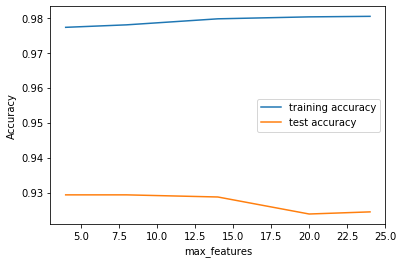

In [438]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 8 to 10

In [439]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [440]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.764447,0.242309,0.052970,0.009247,100,{'min_samples_leaf': 100},0.807107,0.834518,0.863959,0.849746,...,0.836716,0.019314,1,0.862909,0.852755,0.852247,0.847677,0.857868,0.854691,0.005226
1,2.839784,0.032417,0.052571,0.019063,150,{'min_samples_leaf': 150},0.798985,0.817259,0.858883,0.852792,...,0.829202,0.022876,2,0.847931,0.834476,0.836253,0.840061,0.852030,0.842150,0.006769
2,2.261314,0.239542,0.045775,0.013370,200,{'min_samples_leaf': 200},0.794924,0.803046,0.852792,0.840609,...,0.818843,0.023255,3,0.839299,0.830922,0.825590,0.834476,0.833503,0.832758,0.004495
3,1.982866,0.030472,0.039177,0.010752,250,{'min_samples_leaf': 250},0.792893,0.805076,0.851777,0.825381,...,0.814781,0.021496,5,0.831429,0.829652,0.820259,0.821782,0.830711,0.826767,0.004750
4,1.766989,0.043614,0.033182,0.002636,300,{'min_samples_leaf': 300},0.790863,0.815228,0.839594,0.834518,...,0.815187,0.019695,4,0.832953,0.831429,0.809850,0.822544,0.821827,0.823721,0.008271


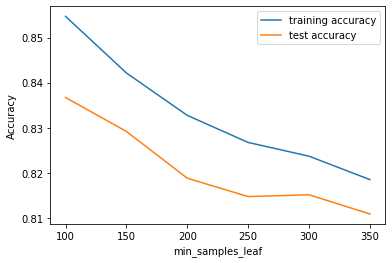

In [441]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 100 to 150

In [442]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [443]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.133780,0.083481,0.023388,0.002798,200,{'min_samples_split': 200},0.819289,0.854822,0.876142,0.863959,...,0.849713,0.020441,1,0.890581,0.877126,0.880427,0.868241,0.880457,0.879366,0.007168
1,2.041433,0.040084,0.021788,0.002784,250,{'min_samples_split': 250},0.802030,0.843655,0.862944,0.857868,...,0.836308,0.023898,2,0.871287,0.860625,0.858847,0.861894,0.868274,0.864185,0.004766
2,1.920103,0.044666,0.022986,0.005017,300,{'min_samples_split': 300},0.802030,0.842640,0.857868,0.852792,...,0.834887,0.021154,3,0.867225,0.854024,0.857578,0.851485,0.859391,0.857941,0.005394
3,2.004654,0.023133,0.024387,0.003135,350,{'min_samples_split': 350},0.788832,0.834518,0.862944,0.848731,...,0.827981,0.027430,4,0.860371,0.848439,0.858086,0.846662,0.849492,0.852610,0.005527
4,1.971273,0.100166,0.024987,0.002755,400,{'min_samples_split': 400},0.787817,0.822335,0.859898,0.848731,...,0.826155,0.025820,5,0.847931,0.841838,0.845392,0.846154,0.847716,0.845806,0.002200


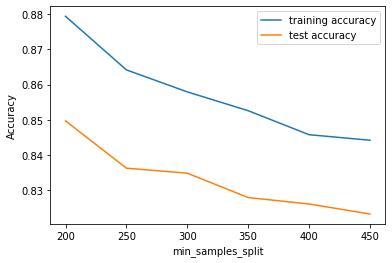

In [444]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 200 to 300

In [445]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [446]:
# Fit the grid search to the data
grid_search.fit(train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [447]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy got is',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy got is 0.8424014691923569 using {'max_depth': 10, 'max_features': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [448]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [449]:
rfc.fit(train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=300)

In [450]:
# predict
y_pred_default = rfc.predict(test_pca)

In [451]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[635, 443],
       [ 60, 102]], dtype=int64)

In [452]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.5943548387096774
Sensitivity:  0.5987654320987654
Specificity:  0.5695732838589982
false postive rate:  0.43042671614100186
positive predictive value:  0.17290552584670232
Negative predictive value:  0.9042709867452136
Misclassification Rate:  0.4266129032258065


In [453]:
# Random forest accuracty - 0.86, sensitivity - 0.23, Specificty - 0.94
# Logistic - 0.88, sensitivity - 0.099, specificity - 0.97
# Decision tree - 0.80, Sensitivity - 0.32, Specificity - .78
# 

In [454]:
# we  have not done imbalance management - which is important - not sure what is that
#Addressed 


# we need to do outlier management?
#Addressed.. have a look.. at the start search for HANDLING OUTLIERS

In [455]:
# next to do compare the accuracies of the models -gaurav

In [456]:
#then do all features whichever model has highest accuracy - Gaurav
# then select which features may need to be looked into?
